In [2]:
import os
from IPython.display import HTML, display,Image
import json

import geopandas as gpd
from geopandas.tools import sjoin

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import pandas as pd

import shapely
from shapely.geometry import Point

import unicodedata
import pysal as ps

import folium
from folium.plugins import MarkerCluster
from folium.map import *
from branca.colormap import linear

# Open Data Project
## Global Alcohol Consumption 
### by Penny Talalak    

In [26]:
HTML('''<center><img src="https://media.giphy.com/media/3o6gaRo60zrZzENKko/giphy.gif" alt="Drawing" style="width: 700px;"/></center>''')

In [4]:
%matplotlib inline

In [5]:
# Loading my dataset
if os.path.isfile("../drinks.csv"):
    filepath = "../drinks.csv"
drinks = pd.read_csv(filepath)

In [6]:
# adding total_serving column 
drinks['total_serving'] = drinks.loc[drinks.continent == 'Europe',:].sum(axis=1)
def total_serving(row):
    return row.beer_servings + row.spirit_servings + row.wine_servings
# make new rows
drinks['total_serving'] = drinks.apply(total_serving, axis=1)
#drinks.head(10)

## Pre-Processing

In [10]:
drinks.head(20)
#print drinks.shape

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_serving
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,275
2,Algeria,25,0,14,0.7,Africa,39
3,Andorra,245,138,312,12.4,Europe,695
4,Angola,217,57,45,5.9,Africa,319
5,Antigua & Barbuda,102,128,45,4.9,North America,275
6,Argentina,193,25,221,8.3,South America,439
7,Armenia,21,179,11,3.8,Europe,211
8,Australia,261,72,212,10.4,Oceania,545
9,Austria,279,75,191,9.7,Europe,545


In [11]:
# choropleth of total_serving

# load geojson file of worldmap
with open('../countries.json') as file:
    f = file.read()
geojson = json.load(open('../countries.json'))
m = folium.Map(zoom_start=10)

from branca.colormap import linear
colormap = linear.YlGn.scale(
    drinks.total_serving.min(),
    drinks.total_serving.max())

total_serving = m.choropleth(geo_str=geojson,
            data=drinks,
            columns=['country', 'total_serving'],
            key_on='feature.properties.name',
            fill_color= 'YlGn',
            highlight=True,
            ) 
colormap.caption = 'Total Alcohol Serving Scale'
m.add_child(colormap)
display(m)

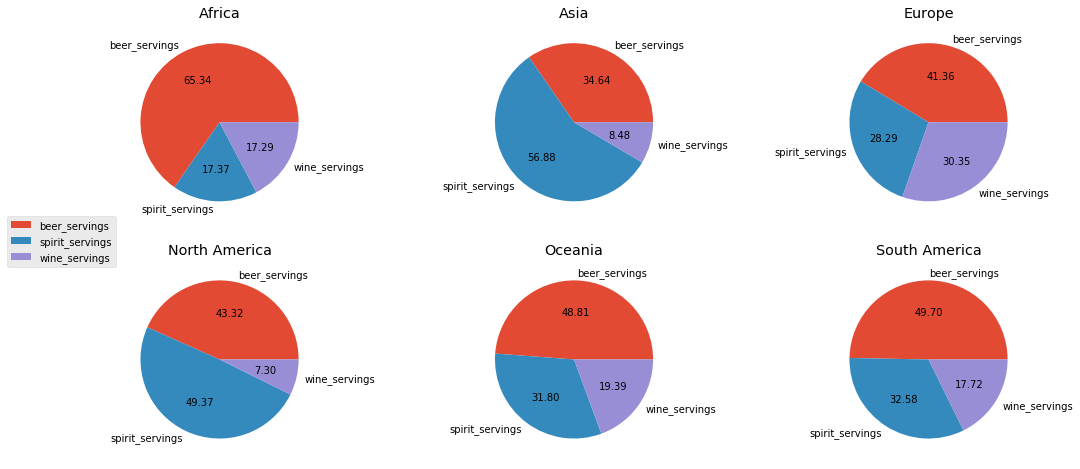

In [25]:
continent = drinks.groupby('continent').sum()
c = continent.iloc[:,[0,1,2]].transpose()
colors = plt.rcParams['axes.color_cycle']
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
for ax, col in zip(axes.flat, c.columns):
    ax.pie(c[col], labels=c.index, autopct='%.2f', colors=colors)
    ax.set(ylabel='', title=col, aspect='equal')
axes[0, 0].legend(bbox_to_anchor=(0, 0.05))

## Exploring top 10 countries:
### Beer
### Spirit
### Wine

In [13]:
drinks.set_index('country')
beer_rank = drinks.sort_values('beer_servings', ascending=False).set_index('country')
beerten = beer_rank.head(10)

def highlight_col(x):
    y = 'background-color: yellow'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:10, 0] = y
    return df1    
beerten.style.apply(highlight_col, axis=None)


In [14]:
drinks.set_index('country')
spirit_rank = drinks.sort_values('spirit_servings', ascending=False).set_index('country')
spiritten = spirit_rank.head(10)

def highlight_col(x):
    y = 'background-color: yellow'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:10, 1] = y
    return df1    
spiritten.style.apply(highlight_col, axis=None)

In [15]:
drinks.set_index('country')
wine_rank = drinks.sort_values('wine_servings', ascending=False).set_index('country')
wineten=wine_rank.head(10)

def highlight_col(x):
    y = 'background-color: yellow'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:10, 2] = y
    return df1    
wineten.style.apply(highlight_col, axis=None)

In [16]:
toptenbeer = [(22.9576, 18.4904), (49.8175, 15.4730), (0.8037, 11.6094), (51.1657, 10.4515), (55.1694, 23.8813), (51.9194, 19.1451), (6.4238, 66.5897), (53.1424, 7.6921), (7.5150, 134.5825), (45.9432, 24.9668)]
toptenwine = [(46.2276, 2.2137),(39.3999, 8.2245),(42.5063, 1.5218),(46.8182, 8.2275),(56.2639, 9.5018),(46.1512, 14.9955),(49.6116, 6.1319),(45.1000, 15.2000),(41.8719, 12.5674),(1.6508, 10.2679)]
toptenspirit = [(12.1165, 61.6790),(53.7098, 27.9534),(18.9712, 72.2852),(61.5240, 105.3188),(13.9094, 60.9789),(4.8604, 58.9302),(48.6690, 19.6990),(15.4150, 61.3710),(15.8700, 100.9925),(21.2367, 159.7777)]

mapit = folium.Map(zoom_start=6)

feature_group = FeatureGroup(name='Beer')
feature_group2 = FeatureGroup(name='Wine')
feature_group3 = FeatureGroup(name='Spirit')
feature_group4 = FeatureGroup(name='Top Countries')

#top 10 countries
for coord in toptenbeer:
    beer_icon = "http://icons.iconarchive.com/icons/graphicloads/food-drink/256/beer-icon.png"
    beer = folium.features.CustomIcon(beer_icon,icon_size=(30,30))
    folium.Marker(location=[coord[0], coord[1]], icon=beer).add_to(feature_group)
    mapit.add_child(feature_group)
    for coord in toptenwine:
        wine_icon = "https://freeiconshop.com/wp-content/uploads/edd/wine-glass-flat.png"
        wine = folium.features.CustomIcon(wine_icon,icon_size=(30,30))
        folium.Marker(location=[coord[0], coord[1]],icon=wine).add_to(feature_group2)
        mapit.add_child(feature_group2)
        for coord in toptenspirit:
            spirit_icon = "https://lh3.googleusercontent.com/zbXxI1_xHXynGyK9Q6EOTXEu5OVXRf6XjaHWB2YVhRgjcLFMiLD3F82ND8H1apubjh-H=w300"
            spirit = folium.features.CustomIcon(spirit_icon,icon_size=(30,30))
            folium.Marker(location=[coord[0], coord[1]],icon=spirit).add_to(feature_group3)
            mapit.add_child(feature_group3)

#top countries to drink win, spirit and beer
wine_icon = "https://freeiconshop.com/wp-content/uploads/edd/wine-glass-flat.png"
wine = folium.features.CustomIcon(wine_icon,icon_size=(30,30))
folium.Marker([46.2276, 2.2137], icon=wine, popup='France: 370').add_to(feature_group4)
mapit.add_child(feature_group4)

spirit_icon = "https://lh3.googleusercontent.com/zbXxI1_xHXynGyK9Q6EOTXEu5OVXRf6XjaHWB2YVhRgjcLFMiLD3F82ND8H1apubjh-H=w300"
spirit = folium.features.CustomIcon(spirit_icon,icon_size=(30,30))
folium.Marker([12.1165, 61.6790], icon=spirit, popup='Grenada: 438').add_to(feature_group4)
mapit.add_child(feature_group4)

beer_icon = "http://icons.iconarchive.com/icons/graphicloads/food-drink/256/beer-icon.png"
beer = folium.features.CustomIcon(beer_icon,icon_size=(30,30))
folium.Marker([22.9576, 18.4904], icon=beer, popup='Namibia: 376').add_to(feature_group4)
mapit.add_child(feature_group4)

mapit.add_child(folium.map.LayerControl())
display(mapit)

# Continent Against the Global Average of Total Serving

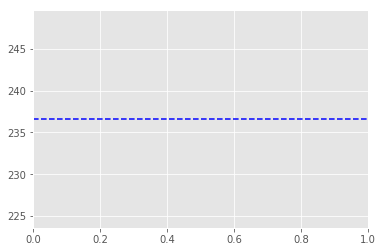

In [17]:
# mean for total serving globally
meanWorld = drinks['total_serving'].mean()
plt.axhline(meanWorld, color='b', linestyle='--')

#Europe
eur = drinks[drinks.continent == 'Europe']
e = eur.iloc[:,[0,6]]

#Asia
asia = drinks[drinks.continent == 'Asia']
a = asia.iloc[:,[0,6]]

#Africa
africa = drinks[drinks.continent == 'Africa']
af = africa.iloc[:,[0,6]]

#Oceania
oceania = drinks[drinks.continent == 'Oceania']
o = oceania.iloc[:,[0,6]]

#North America
north_america = drinks[drinks.continent == 'North America']
na = north_america.iloc[:,[0,6]]

#South America
south_america = drinks[drinks.continent == 'South America']
sa = south_america.iloc[:,[0,6]]

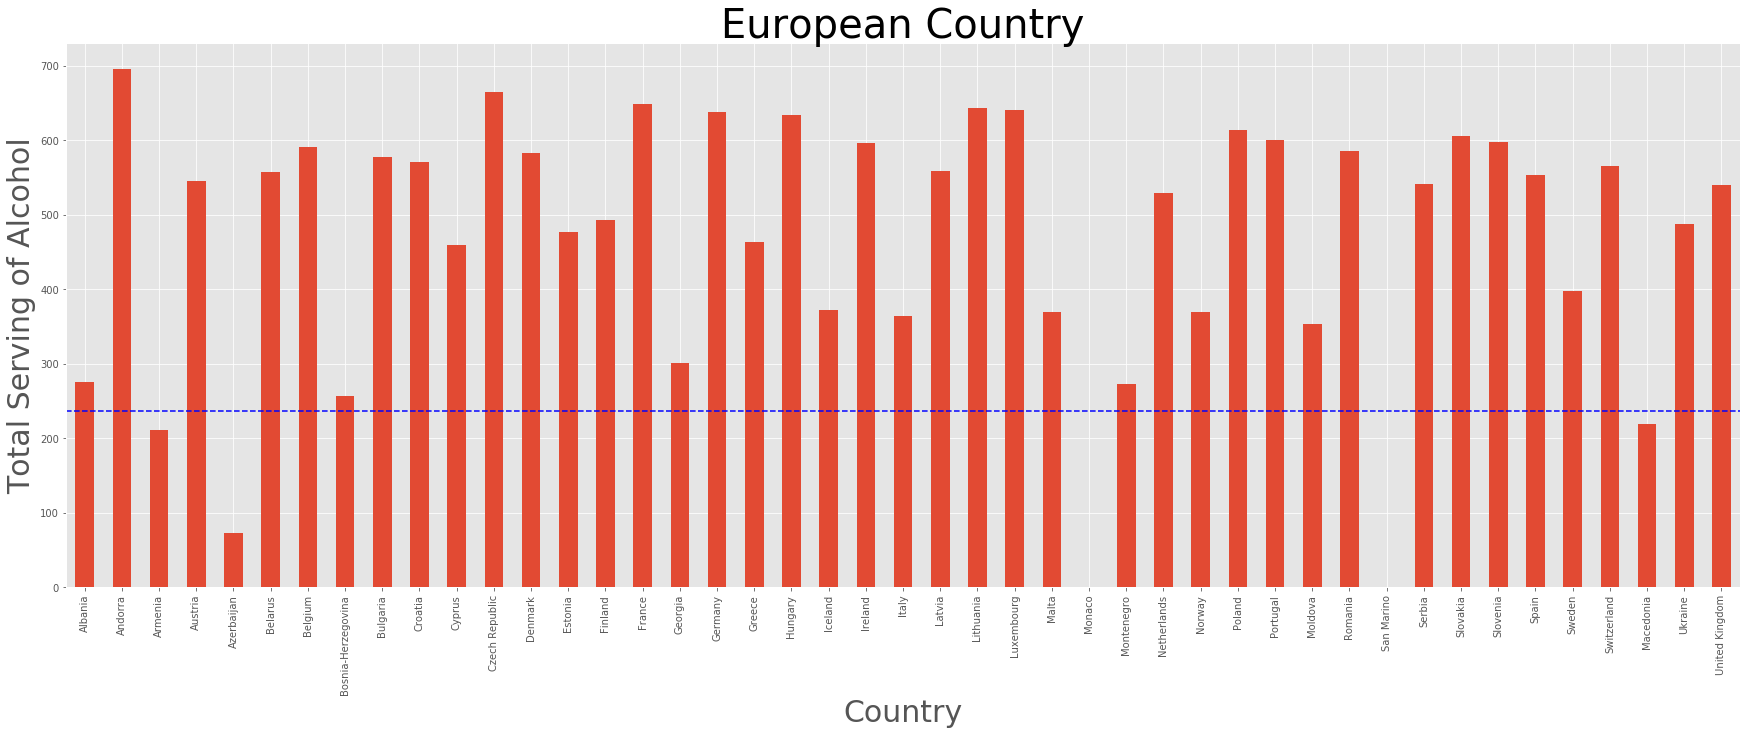

In [18]:
ax = e.set_index('country')['total_serving'].plot.bar(figsize=(30,10))
ax.set_xlabel('Country', size=30)
ax.set_ylabel('Total Serving of Alcohol', size=30)
ax.set_title('European Country', size=40)
plt.axhline(meanWorld, color='b', linestyle='--')

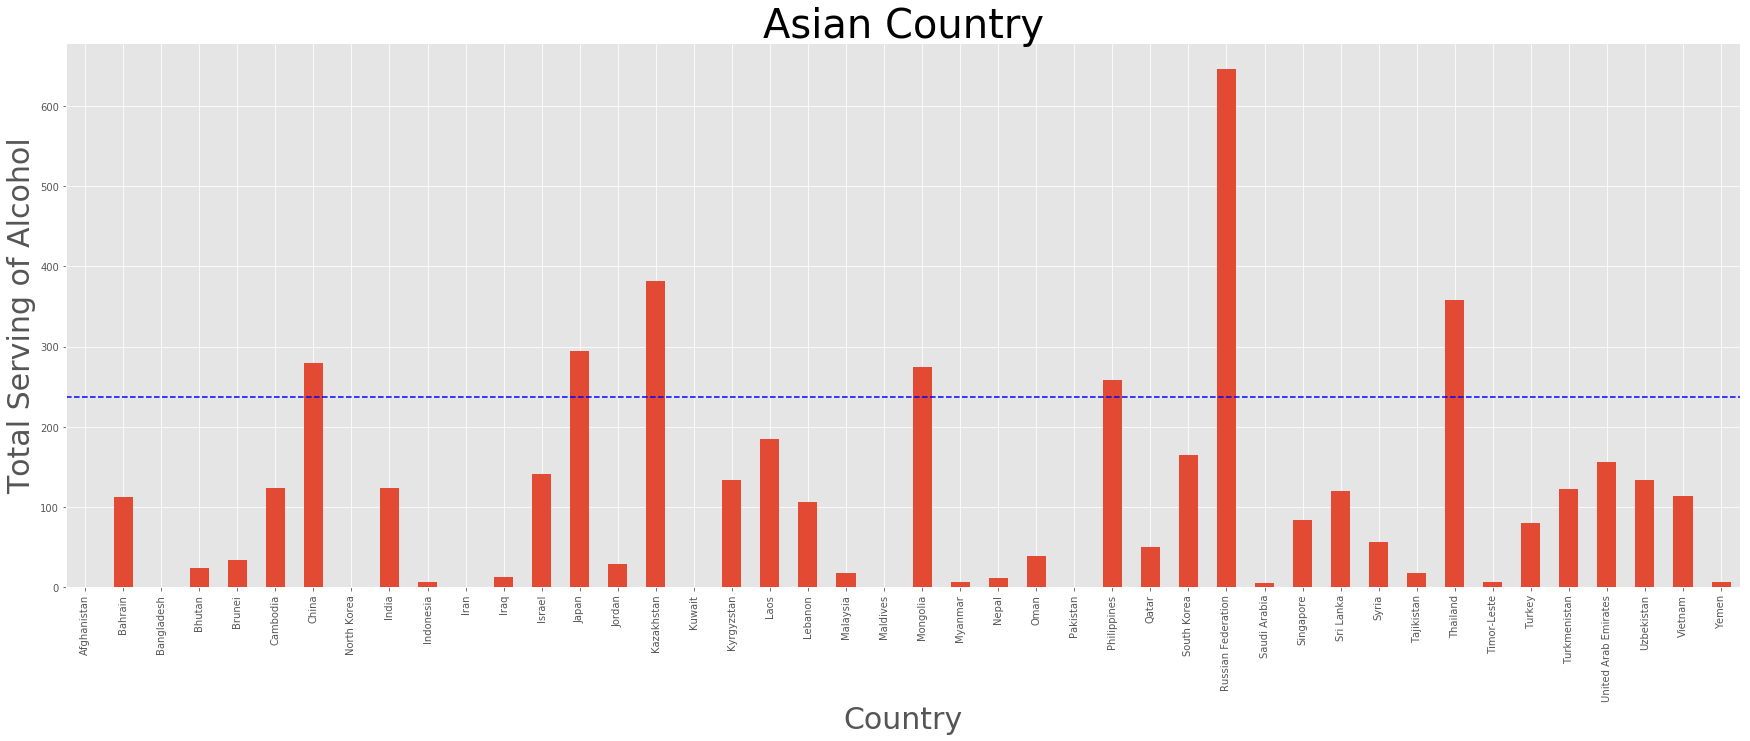

In [19]:
ax = a.set_index('country')['total_serving'].plot.bar(figsize=(30,10))
ax.set_xlabel('Country', size=30)
ax.set_ylabel('Total Serving of Alcohol', size=30)
ax.set_title('Asian Country', size=40)
plt.axhline(meanWorld, color='b', linestyle='--')

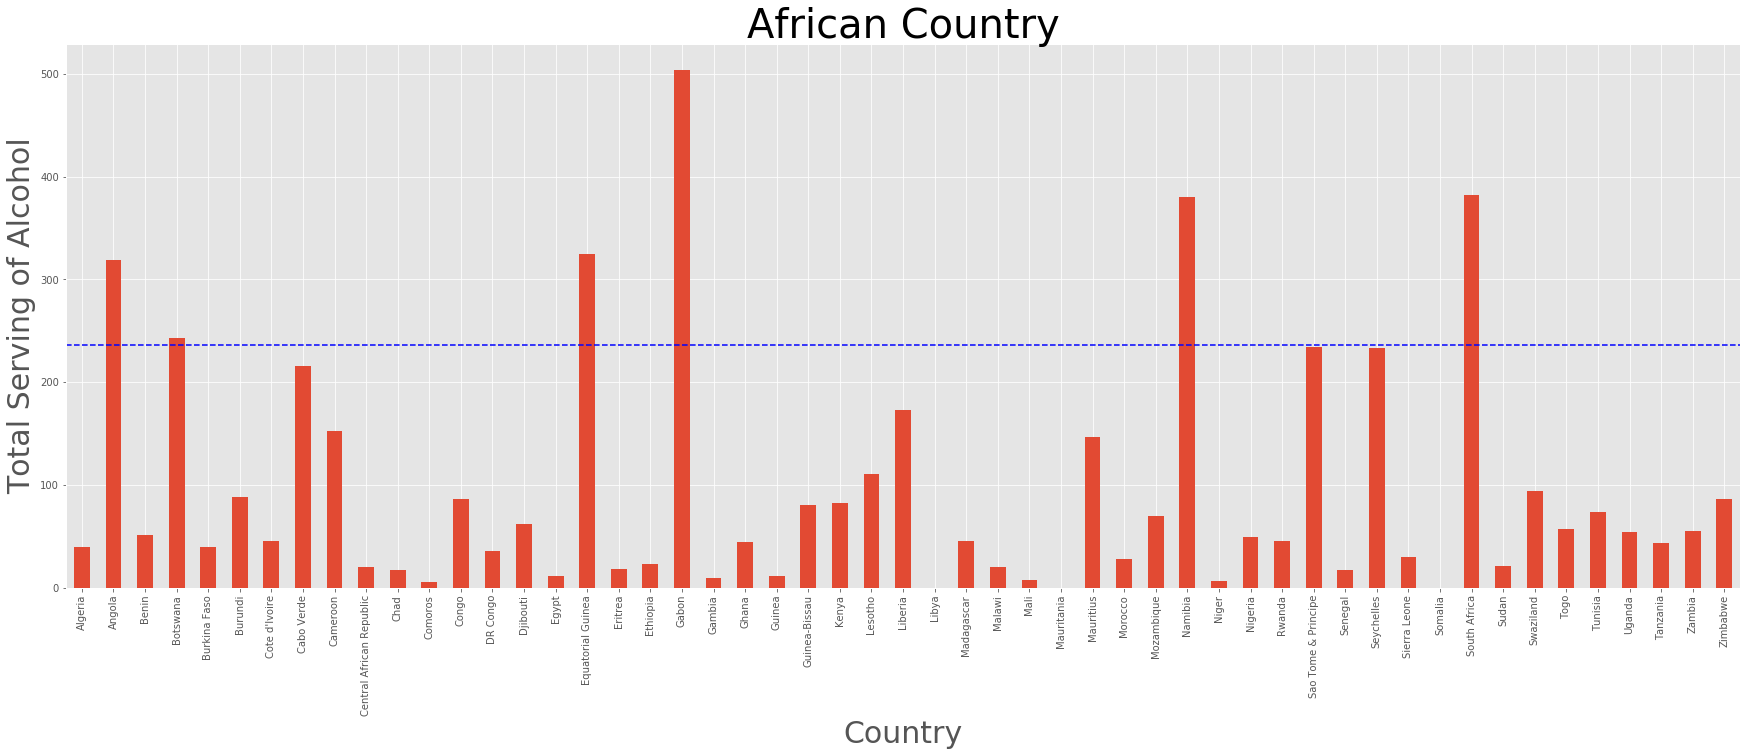

In [20]:
ax = af.set_index('country')['total_serving'].plot.bar(figsize=(30,10))
ax.set_xlabel('Country', size=30)
ax.set_ylabel('Total Serving of Alcohol', size=30)
ax.set_title('African Country', size=40)
plt.axhline(meanWorld, color='b', linestyle='--')

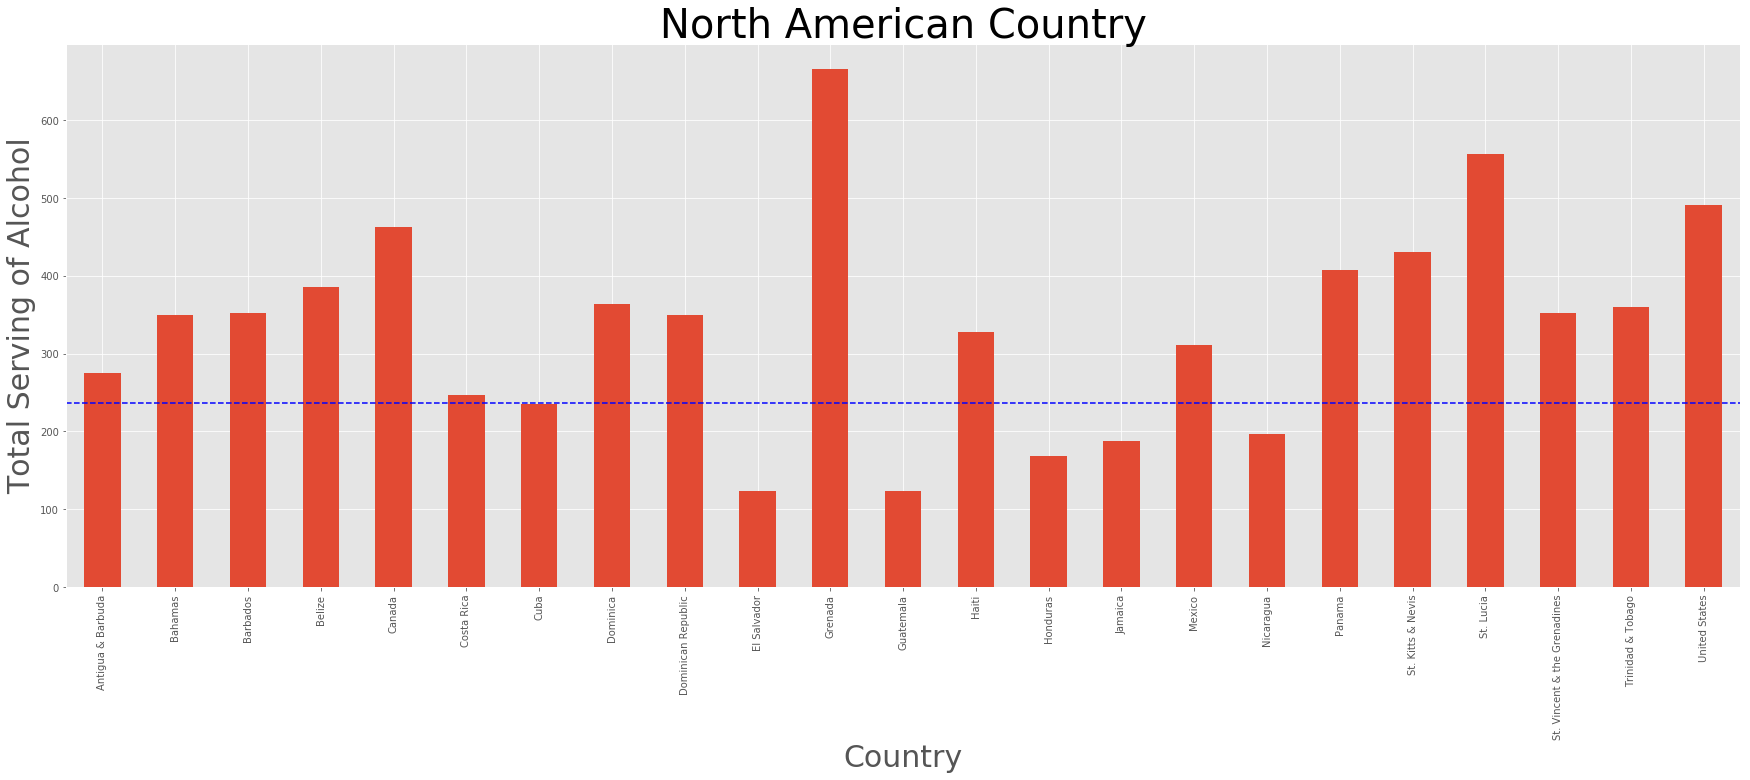

In [21]:
ax = na.set_index('country')['total_serving'].plot.bar(figsize=(30,10))
ax.set_xlabel('Country', size=30)
ax.set_ylabel('Total Serving of Alcohol', size=30)
ax.set_title('North American Country', size=40)
plt.axhline(meanWorld, color='b', linestyle='--')

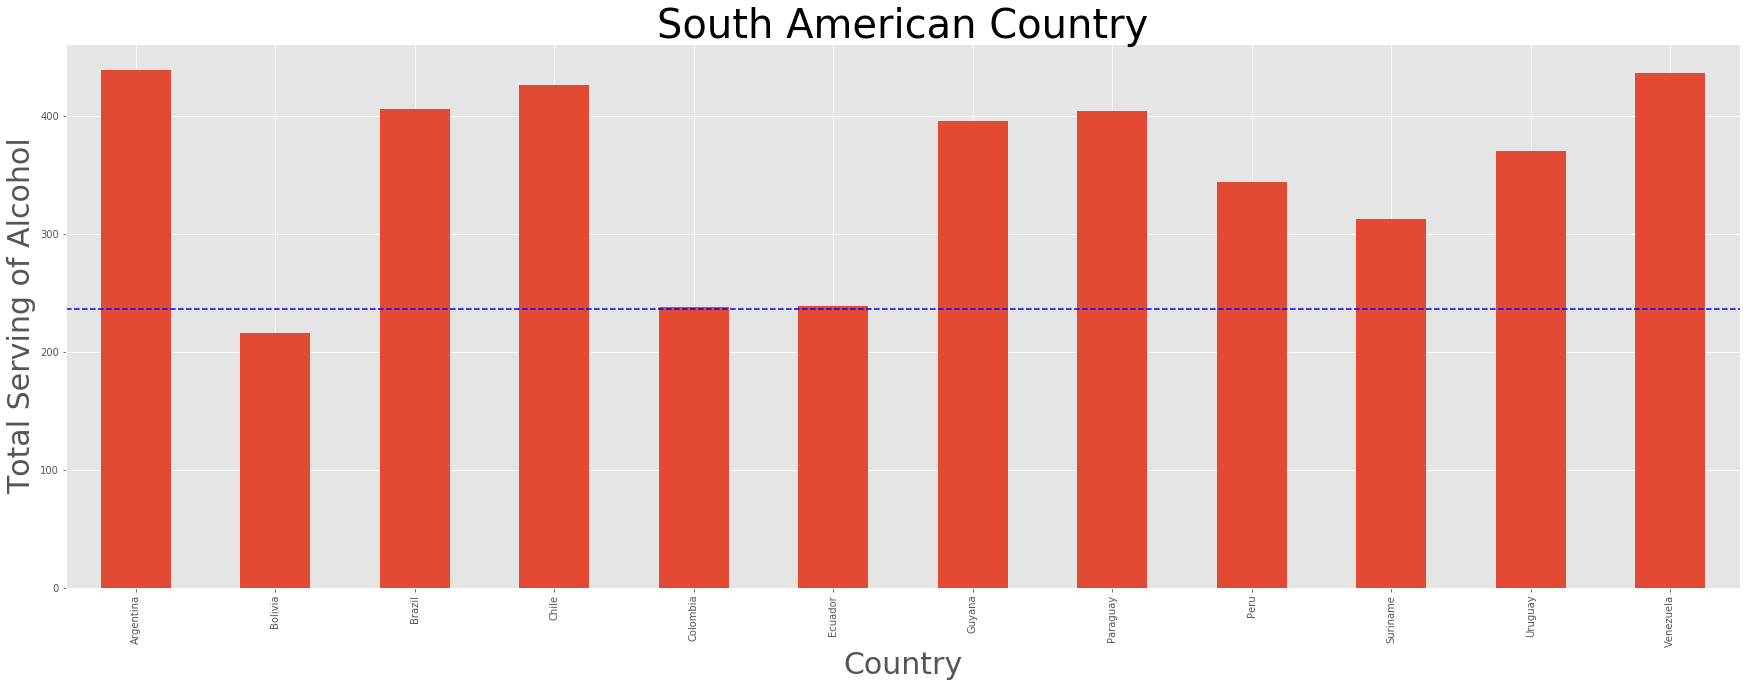

In [22]:
ax = sa.set_index('country')['total_serving'].plot.bar(figsize=(30,10))
ax.set_xlabel('Country', size=30)
ax.set_ylabel('Total Serving of Alcohol', size=30)
ax.set_title('South American Country', size=40)
plt.axhline(meanWorld, color='b', linestyle='--')

# Conclusion


In [23]:
HTML('''<center><img src="https://srilankatwo.files.wordpress.com/2016/04/b7eeb-6730028270747648.png" alt="Drawing" style="width: 500px;"/></center>''')

In [24]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
Open Data Project CODE1161, presentation delivered by Penny Talalak, student number: z5062257
</footer>''')